In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create map dicts
type_of_conflict = {1: "extrasystemic",
                    2: "interstate",
                    3: "intrastate",
                    4: "internationalized intrastate"}

region = {1: "Europe",
          2: "Middle East",
          3: "Asia",
          4: "Africa",
          5: "Americas"}

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9808\1035453269.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[idx, "country"] = val


Filtered data contains 220 rows.
Period 1946-1999 contains 167 rows.
Period 2000-2022 contains 53 rows.
Combined conflict counts:
                                       1946-1999            2000-2022        \
type_of_conflict                               1  2   3   4         2     3   
country                                                                       
Government of France                          50  2   2  11       0.0   0.0   
Government of Russia (Soviet Union)            0  0  20  12       1.0  15.0   
Government of United Kingdom                  25  0  22   8       0.0   0.0   
Government of United States of America         1  0   0  14       0.0   0.0   

                                              
type_of_conflict                           4  
country                                       
Government of France                     5.0  
Government of Russia (Soviet Union)      0.0  
Government of United Kingdom             0.0  
Government of United States of Ame

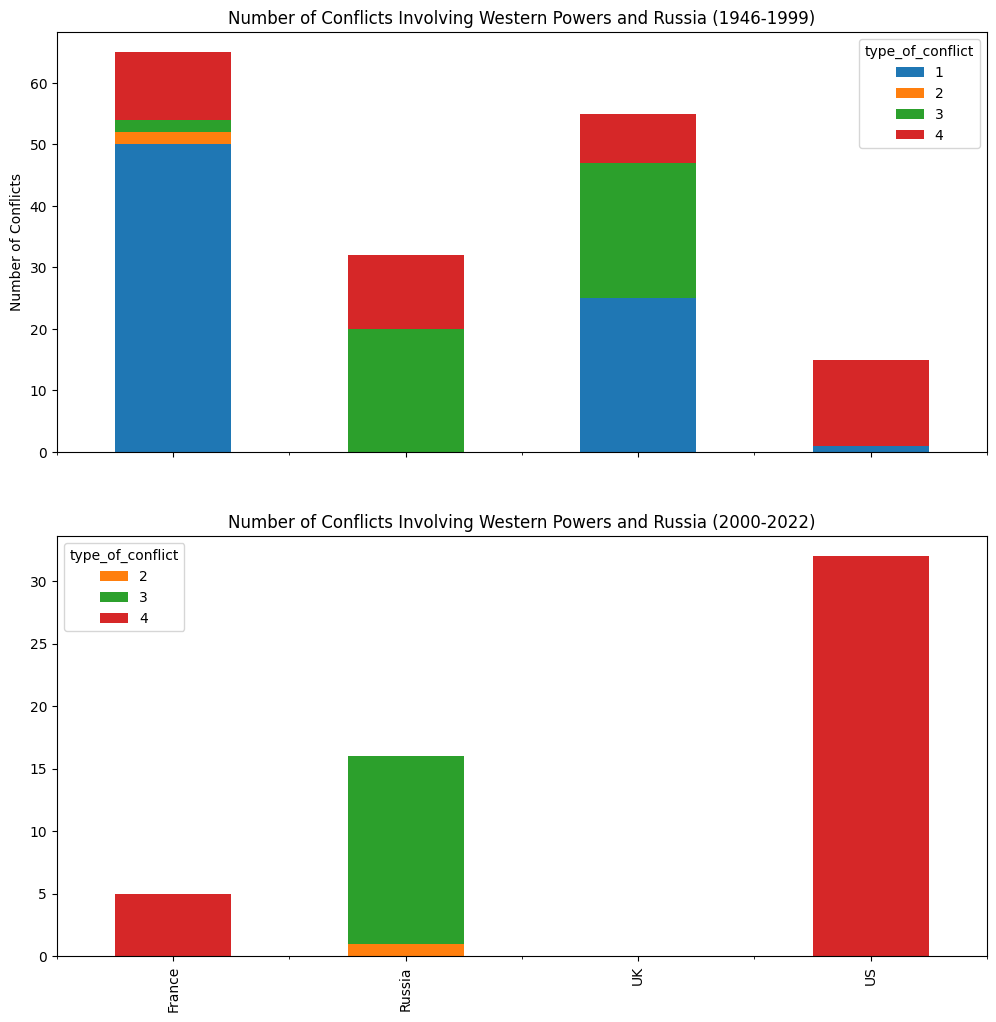

In [10]:
# Define the file path
file_path = "UcdpPrioConflict_v23_1 2.csv"
 
# Step 1: Read the CSV file and handle potential file not found error
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found.")
    exit()
 
# Step 2: Check if the required columns exist
required_columns = {'start_date', 'side_a', 'side_a_2nd', 'type_of_conflict'}
if not required_columns.issubset(df.columns):
    print(f"Error: The CSV file must contain the following columns: {required_columns}")
    print(f"Available columns: {df.columns.tolist()}")
    exit()

# Find event year 
df["start_year"] = df["start_date"].apply(lambda x: int(x[:4]))

# Convert region from number to text
region = {"1": "Europe",
          "2": "Middle East",
          "3": "Asia",
          "4": "Africa",
          "5": "Americas"}
for i in region:
    df["region"] = df["region"].str.replace(i, region[i])

# Interested countries
countries = [
    'Government of Russia (Soviet Union)', 
    'Government of United States of America', 
    'Government of United Kingdom', 
    'Government of France'
]

# Filter dataset based on year and interested sides
df_filtered = df[(df['start_year'] >= 1946) & (df['start_year'] <= 2022) & ((df['side_a'].isin(countries)) | (df['side_a_2nd'].isin(countries)))]

# Combine side_a and side_a_2nd in country column by using interested countries
for idx in df_filtered.index:
    for val in countries:
        if (val == df_filtered.loc[idx, "side_a"]) or (val == df_filtered.loc[idx, "side_a_2nd"]):
            df_filtered.loc[idx, "country"] = val
            break 
 
# Debug: Check if filtering worked
print(f"Filtered data contains {len(df_filtered)} rows.")
if df_filtered.empty:
    print("No data available for the specified filters.")
    exit()
 
# Step 8: Split into two periods
period_1 = df_filtered[(df_filtered['start_year'] >= 1946) & (df_filtered['start_year'] <= 1999)]
period_2 = df_filtered[(df_filtered['start_year'] >= 2000) & (df_filtered['start_year'] <= 2022)]
 
# Debug: Check the number of rows in each period
print(f"Period 1946-1999 contains {len(period_1)} rows.")
print(f"Period 2000-2022 contains {len(period_2)} rows.")
 
# Step 9: Count conflicts for each country and type of conflict in each period
count_period_1 = period_1.groupby(['country', 'type_of_conflict']).size().unstack(fill_value=0)
count_period_2 = period_2.groupby(['country', 'type_of_conflict']).size().unstack(fill_value=0)
 
# Step 10: Combine counts into a DataFrame
counts_combined = pd.concat([count_period_1, count_period_2], keys=['1946-1999', '2000-2022'], axis=1).fillna(0)
 
# Debug: Print the combined DataFrame
print("Combined conflict counts:")
print(counts_combined)
 
# Check if the DataFrame is empty
if counts_combined.empty:
    print("No conflict data to plot.")
    exit()
 
# Step 11: Map full names to short names
name_mapping = {
    'Government of Russia (Soviet Union)': 'Russia',
    'Government of United States of America': 'US',
    'Government of United Kingdom': 'UK',
    'Government of France': 'France'
}
 
# Apply the name mapping
counts_combined.rename(index=name_mapping, inplace=True)
 
# Step 12: Plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

color_map = {
    1: '#1f77b4',  # blue
    2: '#ff7f0e',  # orange
    3: '#2ca02c',  # green
    4: '#d62728'   # red
}

# Plot for 1946-1999
counts_combined['1946-1999'].plot(kind='bar', stacked=True, ax=axes[0], color=color_map)
axes[0].set_title('Number of Conflicts Involving Western Powers and Russia (1946-1999)')
axes[0].set_ylabel('Number of Conflicts')


# Plot for 2000-2022
counts_combined['2000-2022'].plot(kind='bar', stacked=True, ax=axes[1], color=color_map)
axes[1].set_title('Number of Conflicts Involving Western Powers and Russia (2000-2022)')
axes[0].set_ylabel('Number of Conflicts')

plt.xlabel('')

fig.savefig("2.png")

## SAME CODE WITH ABOVE, JUST FILTER NULL TERRITORY_NAME (IF YOU USE ABOVE CODE, DON'T RUN BELOW CELL)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9808\4117244531.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[idx, "country"] = val


Filtered data contains 158 rows.
Period 1946-1999 contains 125 rows.
Period 2000-2022 contains 33 rows.
Combined conflict counts:
                                       1946-1999           2000-2022        \
type_of_conflict                               1  2   3  4         2     3   
country                                                                      
Government of France                          50  2   0  0       0.0   0.0   
Government of Russia (Soviet Union)            0  0  19  0       1.0  15.0   
Government of United Kingdom                  25  0  22  3       0.0   0.0   
Government of United States of America         1  0   0  3       0.0   0.0   

                                              
type_of_conflict                           4  
country                                       
Government of France                     3.0  
Government of Russia (Soviet Union)      0.0  
Government of United Kingdom             0.0  
Government of United States of America  1

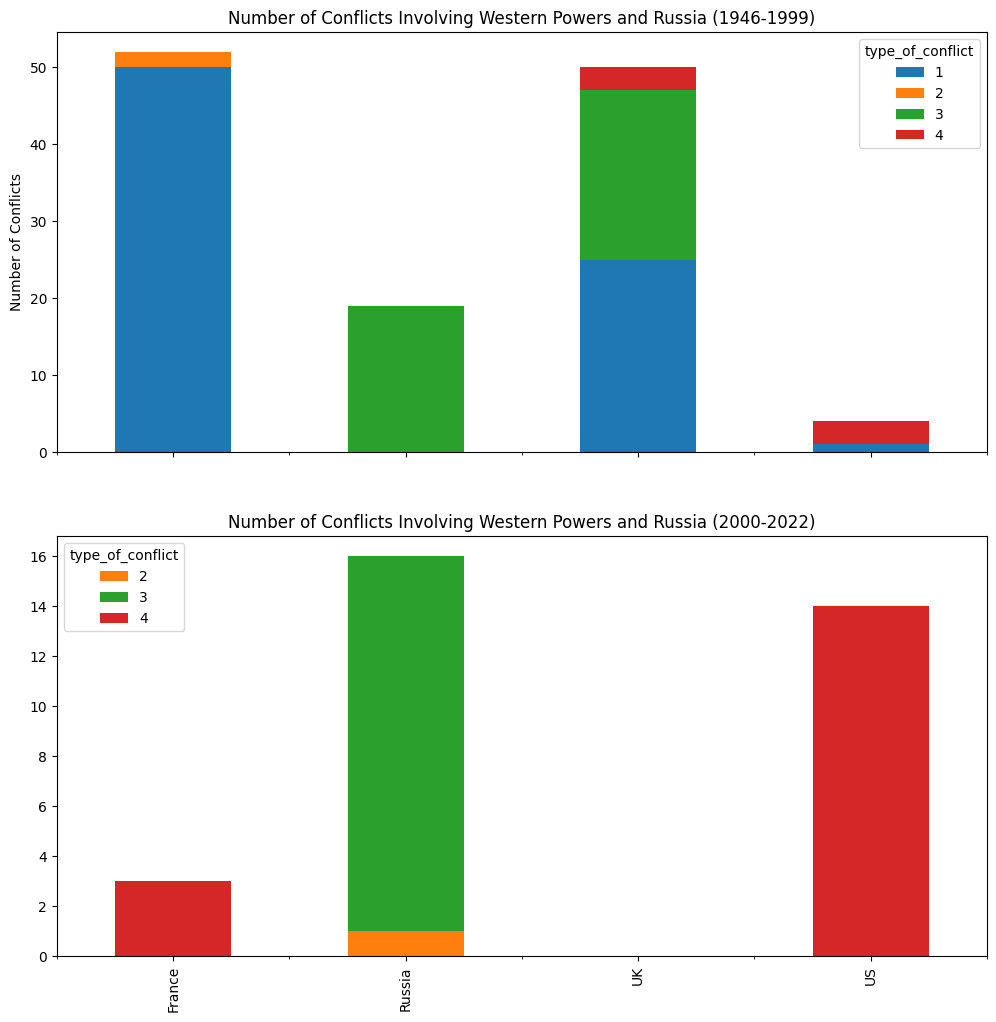

In [11]:
# Define the file path
file_path = "UcdpPrioConflict_v23_1 2.csv"
 
# Step 1: Read the CSV file and handle potential file not found error
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found.")
    exit()
 
# Step 2: Check if the required columns exist
required_columns = {'start_date', 'side_a', 'side_a_2nd', 'type_of_conflict'}
if not required_columns.issubset(df.columns):
    print(f"Error: The CSV file must contain the following columns: {required_columns}")
    print(f"Available columns: {df.columns.tolist()}")
    exit()

# Find event year 
df["start_year"] = df["start_date"].apply(lambda x: int(x[:4]))

# Convert region from number to text
region = {"1": "Europe",
          "2": "Middle East",
          "3": "Asia",
          "4": "Africa",
          "5": "Americas"}
for i in region:
    df["region"] = df["region"].str.replace(i, region[i])

# Interested countries
countries = [
    'Government of Russia (Soviet Union)', 
    'Government of United States of America', 
    'Government of United Kingdom', 
    'Government of France'
]

# Filter dataset based on year and interested sides
df_filtered = df[(df['start_year'] >= 1946) & (df['start_year'] <= 2022) & ((df['side_a'].isin(countries)) | (df['side_a_2nd'].isin(countries)))]

# Combine side_a and side_a_2nd in country column by using interested countries
for idx in df_filtered.index:
    for val in countries:
        if (val == df_filtered.loc[idx, "side_a"]) or (val == df_filtered.loc[idx, "side_a_2nd"]):
            df_filtered.loc[idx, "country"] = val
            break 

# Filter null territory_name
df_filtered = df_filtered[df_filtered["territory_name"].notnull()] 

# Debug: Check if filtering worked
print(f"Filtered data contains {len(df_filtered)} rows.")
if df_filtered.empty:
    print("No data available for the specified filters.")
    exit()
 
# Step 8: Split into two periods
period_1 = df_filtered[(df_filtered['start_year'] >= 1946) & (df_filtered['start_year'] <= 1999)]
period_2 = df_filtered[(df_filtered['start_year'] >= 2000) & (df_filtered['start_year'] <= 2022)]
 
# Debug: Check the number of rows in each period
print(f"Period 1946-1999 contains {len(period_1)} rows.")
print(f"Period 2000-2022 contains {len(period_2)} rows.")
 
# Step 9: Count conflicts for each country and type of conflict in each period
count_period_1 = period_1.groupby(['country', 'type_of_conflict']).size().unstack(fill_value=0)
count_period_2 = period_2.groupby(['country', 'type_of_conflict']).size().unstack(fill_value=0)
 
# Step 10: Combine counts into a DataFrame
counts_combined = pd.concat([count_period_1, count_period_2], keys=['1946-1999', '2000-2022'], axis=1).fillna(0)
 
# Debug: Print the combined DataFrame
print("Combined conflict counts:")
print(counts_combined)
 
# Check if the DataFrame is empty
if counts_combined.empty:
    print("No conflict data to plot.")
    exit()
 
# Step 11: Map full names to short names
name_mapping = {
    'Government of Russia (Soviet Union)': 'Russia',
    'Government of United States of America': 'US',
    'Government of United Kingdom': 'UK',
    'Government of France': 'France'
}
 
# Apply the name mapping
counts_combined.rename(index=name_mapping, inplace=True)
 
# Step 12: Plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

color_map = {
    1: '#1f77b4',  # blue
    2: '#ff7f0e',  # orange
    3: '#2ca02c',  # green
    4: '#d62728'   # red
}

# Plot for 1946-1999
counts_combined['1946-1999'].plot(kind='bar', stacked=True, ax=axes[0], color=color_map)
axes[0].set_title('Number of Conflicts Involving Western Powers and Russia (1946-1999)')
axes[0].set_ylabel('Number of Conflicts')


# Plot for 2000-2022
counts_combined['2000-2022'].plot(kind='bar', stacked=True, ax=axes[1], color=color_map)
axes[1].set_title('Number of Conflicts Involving Western Powers and Russia (2000-2022)')
axes[0].set_ylabel('Number of Conflicts')

plt.xlabel('')

fig.savefig("2-reduced.png")

# GENERATE EXCEL FILES FROM UNFILTERED DATASET

In [56]:
# Define the file path
file_path = "UcdpPrioConflict_v23_1 2.csv"
 
# Step 1: Read the CSV file and handle potential file not found error
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found.")
    exit()
 
# Step 2: Check if the required columns exist
required_columns = {'start_date', 'side_a', 'side_a_2nd', 'type_of_conflict'}
if not required_columns.issubset(df.columns):
    print(f"Error: The CSV file must contain the following columns: {required_columns}")
    print(f"Available columns: {df.columns.tolist()}")
    exit()

# Find event year 
df["start_year"] = df["start_date"].apply(lambda x: int(x[:4]))

# Convert region from number to text
region = {"1": "Europe",
          "2": "Middle East",
          "3": "Asia",
          "4": "Africa",
          "5": "Americas"}
for i in region:
    df["region"] = df["region"].str.replace(i, region[i])

# Interested countries
countries = [
    'Government of Russia (Soviet Union)', 
    'Government of United States of America', 
    'Government of United Kingdom', 
    'Government of France'
]

# Filter dataset based on year and interested sides
df_filtered = df[(df['start_year'] >= 1946) & (df['start_year'] <= 2022) & ((df['side_a'].isin(countries)) | (df['side_a_2nd'].isin(countries)))]

# Combine side_a and side_a_2nd in country column by using interested countries
for idx in df_filtered.index:
    for val in countries:
        if (val == df_filtered.loc[idx, "side_a"]) or (val == df_filtered.loc[idx, "side_a_2nd"]):
            df_filtered.loc[idx, "country"] = val
            break 
 
# Debug: Check if filtering worked
print(f"Filtered data contains {len(df_filtered)} rows.")
if df_filtered.empty:
    print("No data available for the specified filters.")
    exit()
 
# Step 8: Split into two periods
period_1 = df_filtered[(df_filtered['start_year'] >= 1946) & (df_filtered['start_year'] <= 1999)]
period_2 = df_filtered[(df_filtered['start_year'] >= 2000) & (df_filtered['start_year'] <= 2022)]

Filtered data contains 220 rows.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1992\233897938.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[idx, "country"] = val


In [57]:
# Convert country to dataframe index

p1 = period_1.set_index("country").sort_values(["country", "start_date", "region", "territory_name"])[["side_b", "side_b_2nd", "region", "territory_name", "type_of_conflict", "start_date"]]
p2 = period_2.set_index("country").sort_values(["country", "start_date", "region", "territory_name"])[["side_b", "side_b_2nd", "region", "territory_name", "type_of_conflict", "start_date"]]

p1.to_excel("ucdp list 46-99.xlsx")
p2.to_excel("ucdp list 2000-recent.xlsx")